<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson1_Intro_Base/ML_AI_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 1. Основы линейной регрессии

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes

In [2]:
np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, y = load_diabetes(return_X_y=True,as_frame=True)

In [5]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [20]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [7]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Populating the interactive namespace from numpy and matplotlib


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

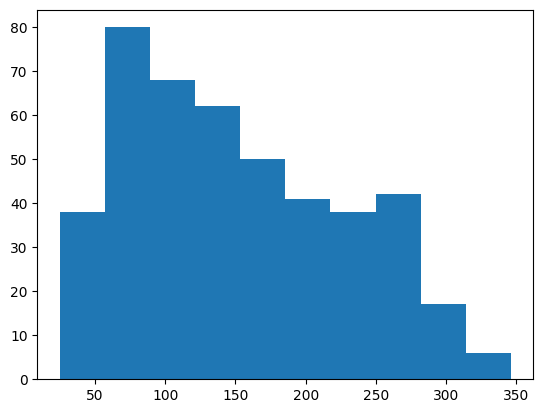

In [8]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y)

(array([30., 58., 45., 50., 37., 33., 28., 30., 14.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

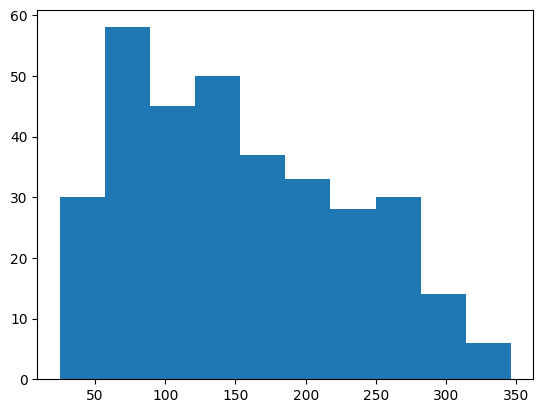

In [9]:
plt.hist(y_train)

(array([14., 21., 18.,  9., 12.,  9.,  6.,  8., 11.,  3.]),
 array([ 37. ,  64.3,  91.6, 118.9, 146.2, 173.5, 200.8, 228.1, 255.4,
        282.7, 310. ]),
 <BarContainer object of 10 artists>)

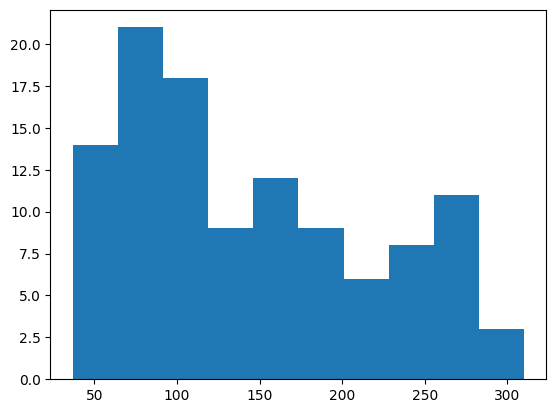

In [10]:
plt.hist(y_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f'''Metrics:
mae={mean_absolute_error(y_test, pred)}
mse={mean_squared_error(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics: 
mae=41.54850685988061
mse=2848.3106508475057
R2=0.4849058889476755



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [15]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'Loss: {max_error(y_test, pred)}')

Loss: 153.65720098110162


В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

Здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [19]:
from sklearn.model_selection import cross_validate

# проверим на кросс-валидации значения ошибок MSE, MAE, R2
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(model,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test mse errors are {-cv_res['test_score']}")
print(f"mean test mse = {-cv_res['test_score'].mean()}")

test mse errors are [2779.92344921 3028.83633883 3237.6875877  3008.74648884 2910.21268776]
mean test mse = 2993.0813104693307
